In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import random
from sklearn.model_selection import train_test_split
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import talos

np.random.seed(123)

In [2]:
data_dirc = '/Users/abdullahaldaffaie/Documents/Flatiron_Curriculum /Flatiron_Projects/Phase_5/facial_expression'
train_folder='/Users/abdullahaldaffaie/Documents/Flatiron_Curriculum /Flatiron_Projects/Phase_5/facial_expression/train'
test_folder= '/Users/abdullahaldaffaie/Documents/Flatiron_Curriculum /Flatiron_Projects/Phase_5/facial_expression/test'
val_folder= '/Users/abdullahaldaffaie/Documents/Flatiron_Curriculum /Flatiron_Projects/Phase_5/facial_expression/val'

In [3]:
# Data description 
#Data divided into train(80%), test(10%), and validation(10%)
#sets in ImageFolder format.
#Labels are:
#0 - Angry
#1 - Disgust
#2 - Fear
#3 - Happy
#4 - Sad
#5 - Surprise
#6 - Neutral

In [3]:
print(os.listdir(data_dirc))

['test', 'train', 'val']


In [4]:
classes = os.listdir(train_folder)
print(classes)

['0', '6', '1', '4', '3', '2', '5']


In [3]:
train_generator = ImageDataGenerator(rescale=1./255, 
                                     width_shift_range=0.1, 
                                     height_shift_range=0.1,
                                     horizontal_flip=True).flow_from_directory(
    train_folder,
    target_size= (48,48),
    batch_size= 28709,
    class_mode= 'categorical')

test_generator = ImageDataGenerator(rescale=1./255, 
                                    width_shift_range=0.1, 
                                    height_shift_range=0.1,
                                    horizontal_flip=True).flow_from_directory(
    test_folder,
    target_size= (48,48),
    batch_size= 3589,
    class_mode= 'categorical')

val_generator =ImageDataGenerator(rescale=1./255, 
                                  width_shift_range=0.1, 
                                  height_shift_range=0.1,
                                  horizontal_flip=True).flow_from_directory(
    train_folder,
    target_size= (48,48),
    batch_size= 28709,
    class_mode='categorical' )

Found 28706 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 28706 images belonging to 7 classes.


In [4]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [21]:
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)

(28709, 48, 48, 3)
(3589, 48, 48, 3)
(28709, 48, 48, 3)
(28709, 7)
(3589, 7)
(28709, 7)


In [23]:
train_generator.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6}

Label: [0. 0. 1. 0. 0. 0. 0.]


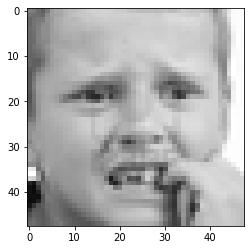

In [24]:
sample_image = train_images[0]
sample_label = train_labels[0]
display(plt.imshow(sample_image))
print('Label: {}'.format(sample_label))

In [5]:
# Adding more layers helped imporve the VAL_ACC 
# define VGG5_block_Daugmentation cnn model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(48, 48, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(7, activation='softmax'))
# compile model
model.compile(optimizer= 'SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history_vgg5 = model.fit(train_images, train_labels, epochs=100, batch_size=64,
                    validation_data=(test_images, test_labels), verbose=1)


Epoch 1/100
449/449 [==============================] - 429s 955ms/step - loss: 1.8007 - accuracy: 0.2564 - val_loss: 1.7652 - val_accuracy: 0.2817
Epoch 2/100
449/449 [==============================] - 415s 924ms/step - loss: 1.7235 - accuracy: 0.3059 - val_loss: 1.6938 - val_accuracy: 0.3218
Epoch 3/100
449/449 [==============================] - 423s 942ms/step - loss: 1.6520 - accuracy: 0.3511 - val_loss: 1.6800 - val_accuracy: 0.3444
Epoch 4/100
449/449 [==============================] - 446s 994ms/step - loss: 1.5822 - accuracy: 0.3873 - val_loss: 1.6416 - val_accuracy: 0.3433
Epoch 5/100
449/449 [==============================] - 297s 663ms/step - loss: 1.5210 - accuracy: 0.4129 - val_loss: 1.5225 - val_accuracy: 0.4140
Epoch 6/100
449/449 [==============================] - 264s 587ms/step - loss: 1.4697 - accuracy: 0.4386 - val_loss: 1.5298 - val_accuracy: 0.3998
Epoch 7/100
449/449 [==============================] - 244s 544ms/step - loss: 1.4166 - accuracy: 0.4579 - val_loss: 1

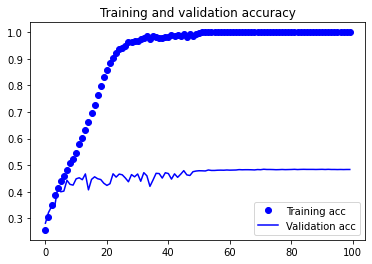

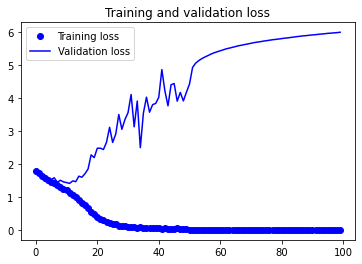

In [7]:
acc = history_vgg5.history['accuracy']
val_acc = history_vgg5.history['val_accuracy']
loss = history_vgg5.history['loss']
val_loss = history_vgg5.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()